# Example: Mapping buried valleys in Kasted, Denmark

In [1]:
%load_ext autoreload
%autoreload 2
import mpslib as mps
import numpy as np
import matplotlib.pyplot as plt


## Get the training image and conditional data

In [2]:
# Get the training image
dx=400 # Lowest resolution - faster
dx=200
#dx=100
#dx=50 # highest resolution - slower
TI, TI_fname = mps.trainingimages.kasted(dx=dx)

url_base = 'https://raw.githubusercontent.com/ergosimulation/mpslib/master/data/kasted'
remote_files=['kasted_soft_well.dat',  'kasted_soft_ele.dat',  'kasted_soft_res.dat','kasted_hard_well_consistent.dat' ]
for local_file in remote_files:
    mps.trainingimages.get_remote('%s/%s' %(url_base,local_file), local_file)
        
# Get conditional point data    
EAS_well=mps.eas.read(remote_files[0])
EAS_ele=mps.eas.read(remote_files[1])
EAS_res=mps.eas.read(remote_files[2])
EAS_well_hard=mps.eas.read(remote_files[3])

In [3]:
# Setup the geometry
x_pad = 4*dx
x_min = np.min(EAS_well['D'][:,0])-x_pad
x_max = np.max(EAS_well['D'][:,0])+x_pad
y_min = np.min(EAS_well['D'][:,1])-x_pad
y_max = np.max(EAS_well['D'][:,1])+x_pad
z_min = np.min(EAS_well['D'][:,2])
z_max = np.max(EAS_well['D'][:,2])
x_min = dx*np.floor(x_min/dx)
y_min = dx*np.floor(y_min/dx)
z_min = dx*np.floor(z_min/dx)

nx=np.int16(np.ceil((x_max-x_min)/dx))
ny=np.int16(np.ceil((y_max-y_min)/dx))
nz=np.max([np.int16(np.ceil((z_max-z_min)/dx)),1])

grid_cell_size = np.array([1, 1, 1])*dx
origin = np.array([x_min, y_min, z_min])

simulation_grid_size=np.array([nx, ny, nz])

print('Origin = [x0,y0,z0]=[%g,%g,%g]' % (origin[0],origin[1],origin[2]))
print('Grid cell size [dx,dy,dz]=[%g,%g,%g]' % (grid_cell_size[0],grid_cell_size[1],grid_cell_size[2]))
print('Simulation Grid size [nx,ny,nz]=[%d,%d,%d]' % (simulation_grid_size[0],simulation_grid_size[1],simulation_grid_size[2]))

print('X:[%g,%g] Y:[%g,%g] Z:[%g,%g]' % (x_min, x_max, y_min, y_max, z_min, z_max))

Origin = [x0,y0,z0]=[560800,6.2246e+06,0]
Grid cell size [dx,dy,dz]=[200,200,200]
Simulation Grid size [nx,ny,nz]=[82,58,1]
X:[560800,577187] Y:[6.2246e+06,6.2362e+06] Z:[0,0]


## Plot the training image and the conditional data

Text(0.5, 0.98, 'Conditional data')

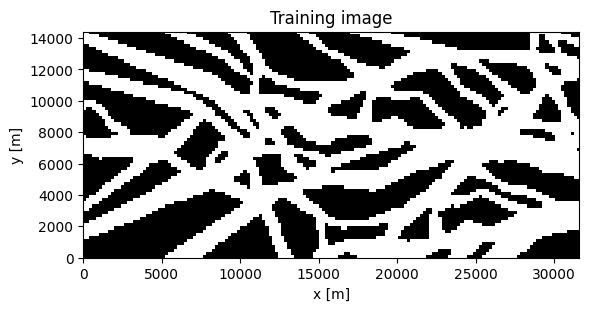

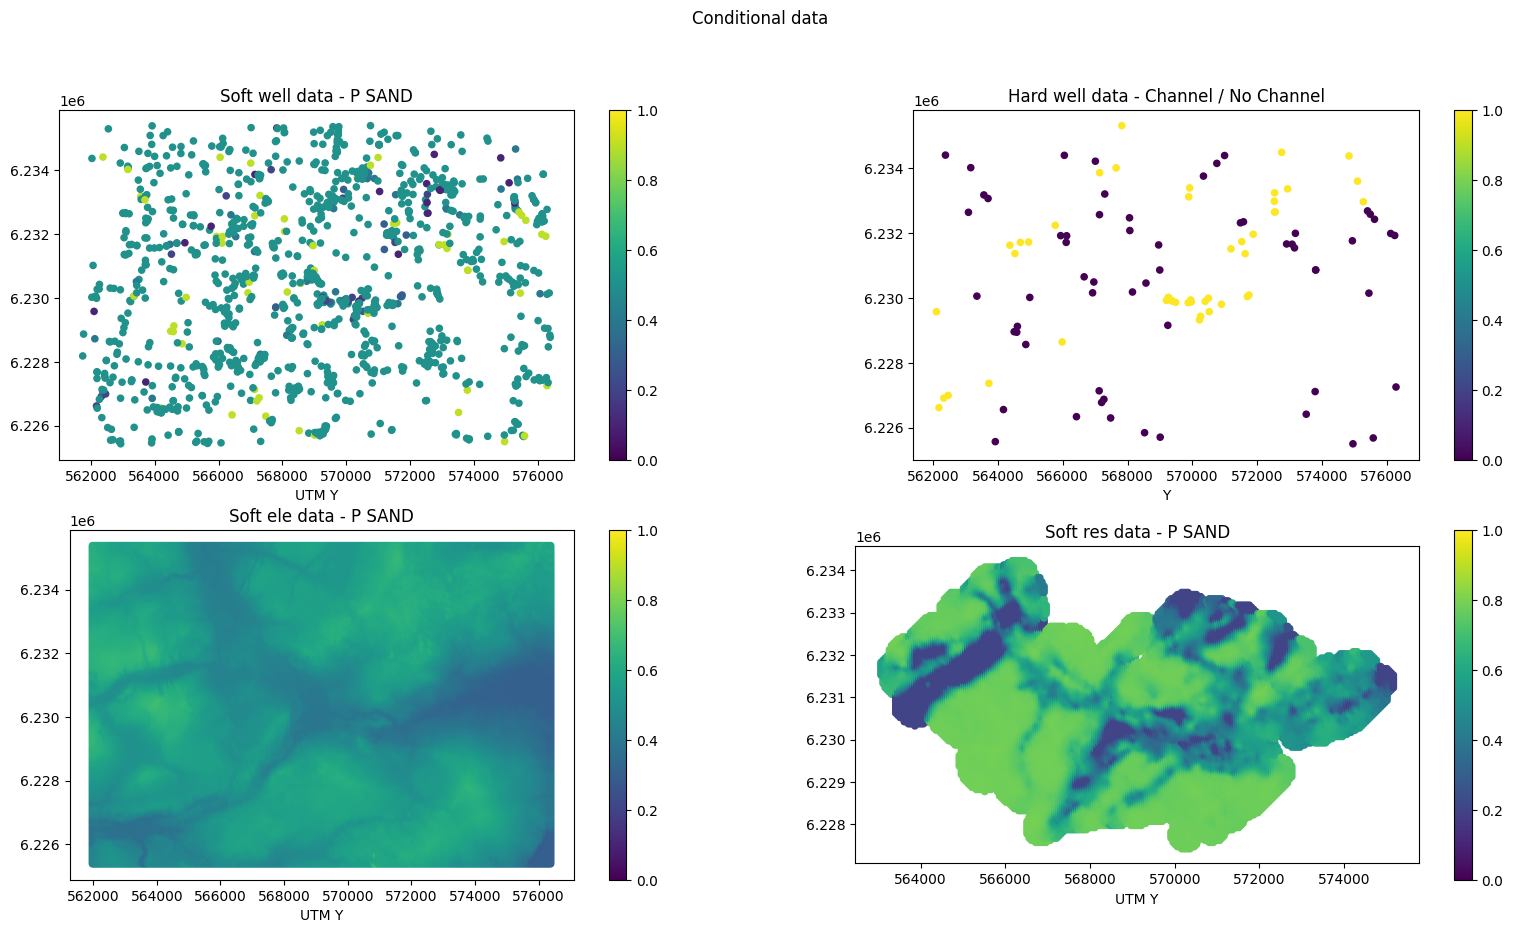

In [4]:
# Create a figure with 2x3 subplot

# TI
plt.figure()
plt.imshow(TI[:,:,0].T, cmap='gray', origin='lower', extent=[0, dx*TI.shape[0], 0, dx*TI.shape[1]])
plt.title('Training image')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

# Conditional data
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Soft well data
scatter_soft = axs[0, 0].scatter(EAS_well['D'][:,0], EAS_well['D'][:,1], c=EAS_well['D'][:,3], s=20, vmin=0, vmax=1)
axs[0, 0].set_title('Soft well data - %s' % EAS_well['header'][3])
axs[0, 0].set_xlabel(EAS_well['header'][0])
axs[0, 0].set_xlabel(EAS_well['header'][1])
axs[0, 0].set_aspect('equal', 'box')
fig.colorbar(scatter_soft, ax=axs[0, 0])

# Hard well data
scatter_hard = axs[0, 1].scatter(EAS_well_hard['D'][:,0], EAS_well_hard['D'][:,1], c=EAS_well_hard['D'][:,3], s=20)    
axs[00, 1].set_title('Hard well data - %s' % EAS_well_hard['header'][3])
axs[0, 1].set_xlabel(EAS_well_hard['header'][0])
axs[0, 1].set_xlabel(EAS_well_hard['header'][1])
axs[0, 1].set_aspect('equal', 'box')
fig.colorbar(scatter_hard, ax=axs[0, 1])

# ELE data
scatter_ele = axs[1, 0].scatter(EAS_ele['D'][:,0], EAS_ele['D'][:,1], c=EAS_ele['D'][:,3], s=20, vmin=0, vmax=1)
axs[1, 0].set_title('Soft ele data - %s' % EAS_ele['header'][3])
axs[1, 0].set_xlabel(EAS_ele['header'][0])
axs[1, 0].set_xlabel(EAS_ele['header'][1])
axs[1, 0].set_aspect('equal', 'box')
fig.colorbar(scatter_ele, ax=axs[1, 0])

# RES data
scatter = axs[1, 1].scatter(EAS_res['D'][:,0], EAS_res['D'][:,1], c=EAS_res['D'][:,3], s=20, vmin=0, vmax=1)
axs[1, 1].set_title('Soft res data - %s' % EAS_res['header'][3])
axs[1, 1].set_xlabel(EAS_res['header'][0])
axs[1, 1].set_xlabel(EAS_res['header'][1])
axs[1, 1].set_aspect('equal', 'box')
fig.colorbar(scatter, ax=axs[1, 1])

fig.suptitle('Conditional data')



### Optionally remove non-informed conditional well data


(1254, 5)
(147, 5)


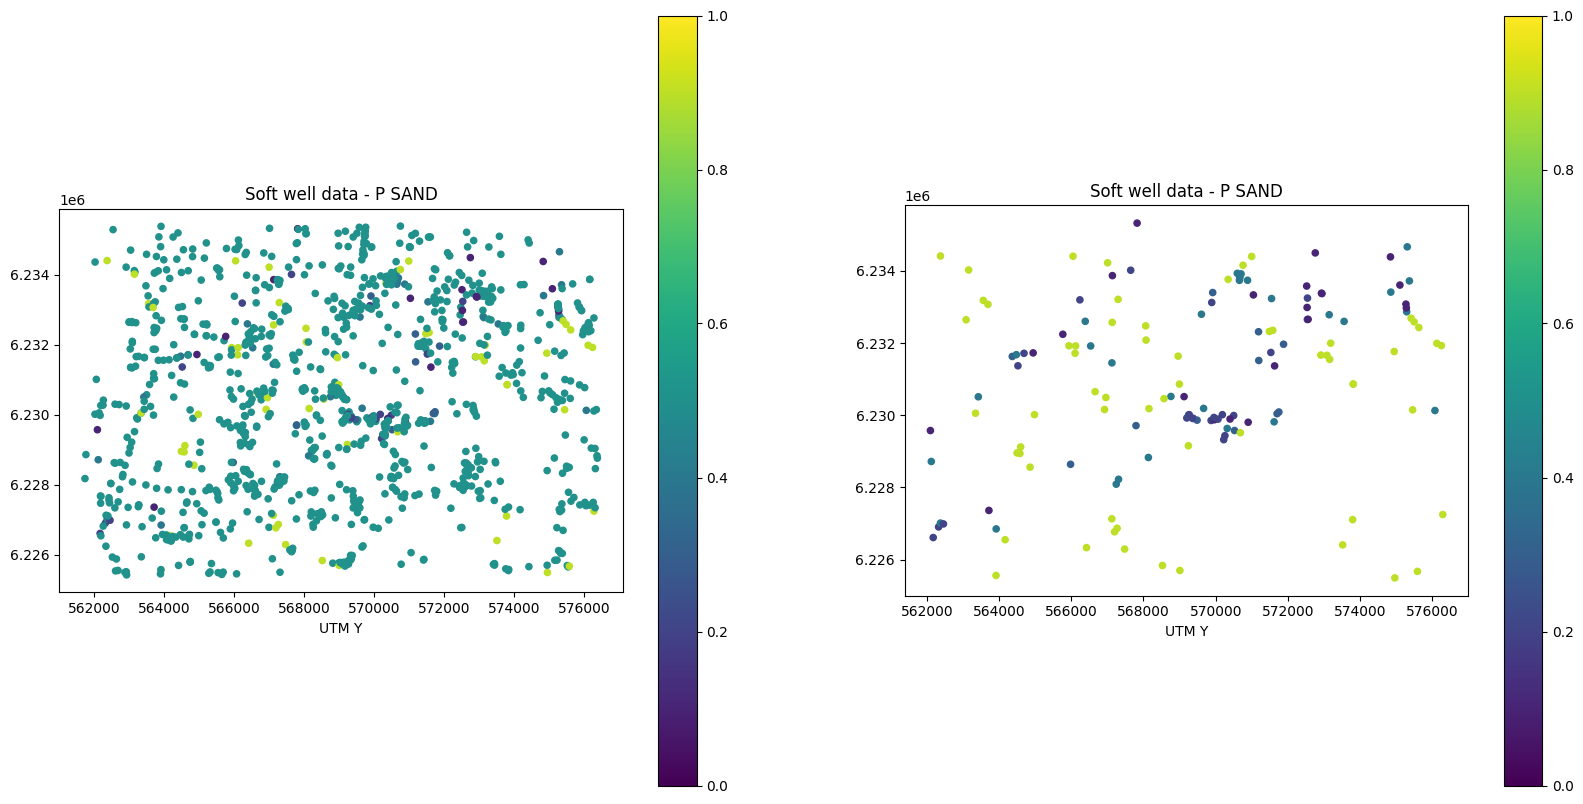

In [5]:

# Optionally remove non-informed conditional well data
RemoveUninformed = True

if RemoveUninformed:
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    # Before
    scatter_soft = axs[0].scatter(EAS_well['D'][:,0], EAS_well['D'][:,1], c=EAS_well['D'][:,3], s=20, vmin=0, vmax=1)
    axs[0].set_title('Soft well data - %s' % EAS_well['header'][3])
    axs[0].set_xlabel(EAS_well['header'][0])
    axs[0].set_xlabel(EAS_well['header'][1])
    axs[0].set_aspect('equal', 'box')
    fig.colorbar(scatter_soft, ax=axs[0])
    
    
    print(EAS_well['D'].shape)
    informed_well_soft_data=np.argwhere(np.abs(EAS_well['D'][:,4]-0.5)>0.05)
    i_use=informed_well_soft_data.flatten()
    EAS_well['D']=EAS_well['D'][i_use,:]
    print(EAS_well['D'].shape)
    
    # After
    scatter_soft = axs[1].scatter(EAS_well['D'][:,0], EAS_well['D'][:,1], c=EAS_well['D'][:,3], s=20, vmin=0, vmax=1)
    axs[1].set_title('Soft well data - %s' % EAS_well['header'][3])
    axs[1].set_xlabel(EAS_well['header'][0])
    axs[1].set_xlabel(EAS_well['header'][1])
    axs[1].set_aspect('equal', 'box')
    fig.colorbar(scatter_soft, ax=axs[1])



# MPSlib in Kasted
Given the data above, the challenge is to estimate the probability that a buried valley exists in the area. 

## Setup and run MPSlib

Using mps_snesim_tree installed in /mnt/space/space_au11687/PROGRAMMING/mpslib (scikit-mps in /mnt/space/space_au11687/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)
parallel: Using 20 of max 26 threads


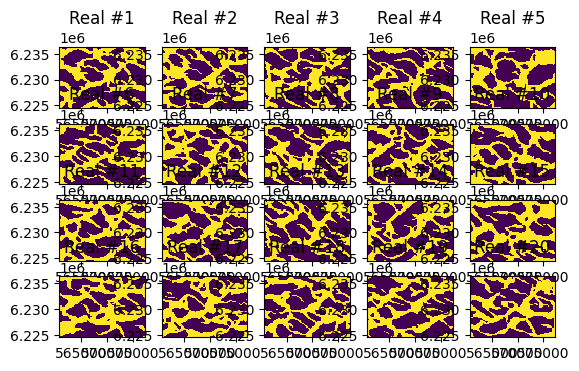

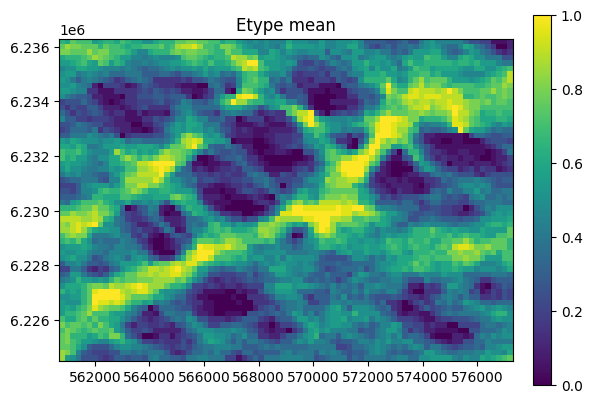

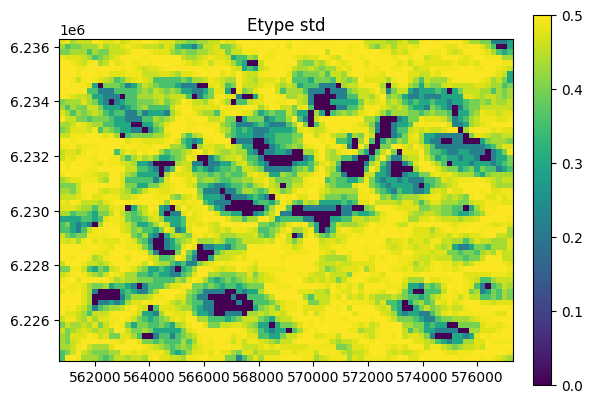

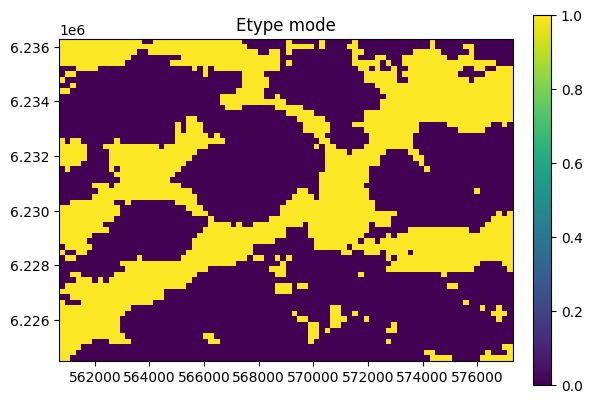

In [6]:
method = 'mps_genesim'
method = 'mps_snesim_tree'
O=mps.mpslib(method=method, 
             simulation_grid_size=simulation_grid_size, 
             origin=origin, 
             grid_cell_size=grid_cell_size)
O.par['n_real']=20
O.ti=TI

O.run_parallel()

O.plot_reals()

O.plot_etype()



# Conditional simulation - hard data
Adjust the simulation parameters to use hard conditional data. 
For help take a look at the [documentation](https://mpslib.readthedocs.io/en/latest/python-interface.html), and https://github.com/ergosimulation/mpslib/blob/master/scikit-mps/examples/ex_mpslib_hard_and_soft.ipynb


In [ ]:
method = 'mps_genesim'
method = 'mps_snesim_tree'
O=mps.mpslib(method=method, 
             simulation_grid_size=simulation_grid_size, 
             origin=origin, 
             grid_cell_size=grid_cell_size)
O.ti=TI

O.d_hard = EAS_well_hard['D']

O.plot_hard()

In [ ]:
O.par['n_real']=4
O.ti=TI

O.run_parallel()

O.plot_reals()

O.plot_etype()

# Conditional simulation - soft data
Adjust the simulation parameters to use soft conditional data

In [ ]:
method = 'mps_genesim'
method = 'mps_snesim_tree'
O=mps.mpslib(method=method, 
             simulation_grid_size=simulation_grid_size, 
             origin=origin, 
             grid_cell_size=grid_cell_size)
O.ti=TI

# O.d_hard = EAS_well_hard['D']

O.d_soft = EAS_well['D']

O.plot_soft()



# Conditional simulation - Setup MPSlib to use both conditional hard well data, aoft conditional data related to ELEVATION and RESISTIVITY





# Conditional estimation 
Setup MPS lib to perform sequential ESTIMATION, of the cases considered above.
Get ideas from https://github.com/ergosimulation/mpslib/blob/master/scikit-mps/examples/ex_mpslib_estimation.ipynb
